In [1]:
import sys
sys.path.append("../../")
from radarange_orchestrator import llm
from radarange_orchestrator.utils.pretty_print import show_final_answer

In [6]:
from tika import tika
from tika import parser
tika.TikaClientOnly = True

In [7]:
path = "downloads/Drofa_NV_EIT_Nuclear_Spin_2024.pdf"
parsed = parser.from_file(path)
print(parsed["metadata"])

{'pdf:PDFVersion': '1.7', 'xmp:CreatorTool': 'Microsoft® Word 2016', 'pdf:hasXFA': 'false', 'X-TIKA:Parsed-By-Full-Set': ['org.apache.tika.parser.DefaultParser', 'org.apache.tika.parser.pdf.PDFParser'], 'X-TIKA:content_handler': 'ToTextContentHandler', 'pdf:num3DAnnotations': '0', 'dc:format': 'application/pdf; version=1.7', 'pdf:docinfo:creator_tool': 'Microsoft® Word 2016', 'access_permission:fill_in_form': 'true', 'pdf:hasCollection': 'false', 'pdf:encrypted': 'false', 'pdf:containsNonEmbeddedFont': 'true', 'xmp:CreateDate': '2025-03-20T07:23:43Z', 'pdf:hasMarkedContent': 'true', 'pdf:ocrPageCount': '0', 'access_permission:can_print_faithful': 'true', 'xmp:ModifyDate': '2025-03-20T07:23:43Z', 'pdf:docinfo:creator': 'Учетная запись Майкрософт', 'access_permission:extract_for_accessibility': 'true', 'resourceName': "b'Drofa_NV_EIT_Nuclear_Spin_2024.pdf'", 'X-TIKA:Parsed-By': ['org.apache.tika.parser.DefaultParser', 'org.apache.tika.parser.pdf.PDFParser'], 'X-TIKA:embedded_depth': '0',

In [8]:
parsed.keys()

dict_keys(['metadata', 'content', 'status'])

In [9]:
print(parsed["content"].strip()[:1000])

*Contact author: a.akimov@rqc.ru 

Bichromatic microwave manipulation of the NV 

center nuclear spin using transition not detectable 

via optically detected magnetic resonance 
S.M. Drofa1,2,3, V.V. Soshenko3,4, I.S. Cojocaru1,3,4, S.V. Bolshedvorskii3,4, P. G. Vilyuzhanina1,3,5, E.A. Primak1,2,3, 

A.M. Kozodaev1,3,5, A. Chernyavskiy1,2,3, V.G. Vins6, V.N. Sorokin1,2, A.N. Smolyaninov4, S.Ya. Kilin5,7 and A.V. 

Akimov1,3,4* 

1Russian Quantum Center, Bolshoy Boulevard 30, building 1, Moscow, 143025, Russia 
2Moscow Institute of Physics and Technology, 9 Institutskiy per., Dolgoprudny, Moscow Region, 141701, Russia 
3P.N. Lebedev Institute RAS, Leninsky Prospekt 53, Moscow, 119991, Russia 
4LLC Sensor Spin Technologies, 121205 Nobel St. 9, Moscow, Russia 
5National Research Nuclear University “MEPhI”, 31, Kashirskoe Highway, Moscow, 115409 Russia 
6LLC Velman, 1/3 st. Zelenaya Gorka, Novosibirsk ,630060, Russia 
7B.I. Stepanov Institute of Physics NASB, 68, Nezavisimosty Ave, Minsk,

In [23]:
import pymupdf

doc = pymupdf.open(path) # open a document
text = ''
for page in doc: # iterate the document pages
    text += page.get_text()

In [24]:
pages = list(doc)
len(pages)

11

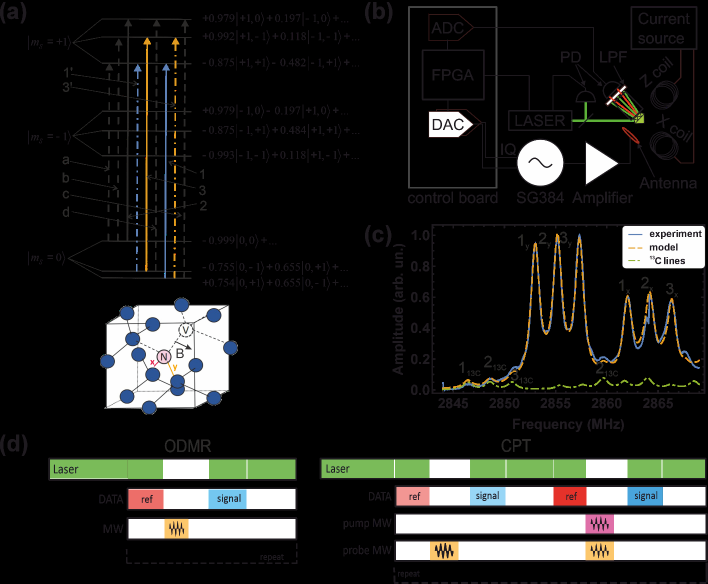

In [26]:
page = pages[2]
image_list = page.get_images()
pix = pymupdf.Pixmap(doc, image_list[0][0])
pim = pix.pil_image()
pim.reduce(2).show()

In [44]:
page = doc.load_page(6)
blocks = page.get_text("blocks")

for b in blocks:
    print(b[4])

*Contact author: a.akimov@rqc.ru 

explanation can be provided as follows: it is true that 
for both “a” and “d” resonances, the microwave 
intensity and dipole moment of transitions are similar 
and therefore have similar contrast Rabi frequencies of 
transitions “a” and “d”. Here, CPT resonances are 
assumed to be far from saturation. Nevertheless, it is 
not necessary to contradict the fact that the resonance 

was not observed. The fact that transitions “a” and “b” 
are not observed at the ODMR spectrum may be 
explained because they are very close to the strong 
transitions 2 and 3, both with the isotopic shift of 13C 
in the nearest node, which is due to their relatively 
large width in natural diamond.  

 

Fig. 4. (a) – Ground state of the NV center in a “perpendicular” magnetic field. Thick color lines indicate the -
systems associated with “c” and “d” transitions. 
4.945
Q = −
 stands for nuclear zero-field splitting, 
2.162
zz
A = −
 MHz 
is the longitudinal component of t

In [46]:
page.get_links()

[{'kind': 1,
  'xref': 142,
  'from': Rect(268.6600036621094, 524.3599853515625, 299.010009765625, 536.3599853515625),
  'page': 7,
  'to': Point(82.0, 434.91999),
  'zoom': 0.0,
  'id': ''},
 {'kind': 1,
  'xref': 147,
  'from': Rect(136.2100067138672, 644.3599853515625, 166.0399932861328, 656.3599853515625),
  'page': 6,
  'to': Point(82.0, 430.91999),
  'zoom': 0.0,
  'id': ''},
 {'kind': 1,
  'xref': 149,
  'from': Rect(189.6300048828125, 749.3590087890625, 220.36000061035156, 761.3590087890625),
  'page': 7,
  'to': Point(82.0, 434.91999),
  'zoom': 0.0,
  'id': ''},
 {'kind': 1,
  'xref': 152,
  'from': Rect(471.5299987792969, 740.3599853515625, 499.3699951171875, 764.3590087890625),
  'page': 7,
  'to': Point(82.0, 434.91999),
  'zoom': 0.0,
  'id': ''}]

In [60]:
def extract_formula(page):
    # Extract text with coordinates and sequence numbers
    text_data = page.get_text("rawdict")
    formula_elements = []
    
    for block in text_data["blocks"]:
        for line in block.get("lines", []):
            for span in line["spans"]:
                for char in span["chars"]:
                    formula_elements.append({
                        "char": char["c"],
                        "bbox": char["bbox"],
                        "seqno": span.get("seqno", -1)
                    })
    
    # Sort by Y (vertical) then X (horizontal) coordinates
    formula_elements.sort(key=lambda x: (x["bbox"][1], x["bbox"][0]))
    
    # Reconstruct formula string
    formula = "".join([e["char"] for e in formula_elements])
    return formula

In [58]:
for block in page.get_text("rawdict")['blocks']:
    print(block)
    break

{'number': 0, 'type': 0, 'bbox': (85.10399627685547, 795.6055908203125, 226.82000732421875, 806.63134765625), 'lines': [{'spans': [{'size': 9.960000038146973, 'flags': 4, 'bidi': 0, 'char_flags': 16, 'font': 'TimesNewRomanPSMT', 'color': 0, 'alpha': 255, 'ascender': 0.890999972820282, 'descender': -0.2160000056028366, 'chars': [{'origin': (85.10399627685547, 804.47998046875), 'bbox': (85.10399627685547, 795.6055908203125, 90.08399963378906, 806.63134765625), 'c': '*', 'synthetic': False}, {'origin': (90.02423858642578, 804.47998046875), 'bbox': (90.02423858642578, 795.6055908203125, 96.66755676269531, 806.63134765625), 'c': 'C', 'synthetic': False}, {'origin': (96.62771606445312, 804.47998046875), 'bbox': (96.62771606445312, 795.6055908203125, 101.60771942138672, 806.63134765625), 'c': 'o', 'synthetic': False}, {'origin': (101.65751647949219, 804.47998046875), 'bbox': (101.65751647949219, 795.6055908203125, 106.63751983642578, 806.63134765625), 'c': 'n', 'synthetic': False}, {'origin':

In [61]:
print(extract_formula(page))

explanation can be provided as follows: it is true that was not observed. The fact that transitions “a” and “b” for both “a” and “d” resonances, the microwave are not observed at the ODMR spectrum may be intensity and dipole moment of transitions are similar explained because they are very close to the strong and therefore have similar contrast Rabi frequencies of transitions 2 and 3, both with the isotopic shift of 13C transitions “a” and “d”. Here, CPT resonances are in the nearest node, which is due to their relatively assumed to be far from saturation. Nevertheless, it is large width in natural diamond.  not necessary to contradict the fact that the resonance  Fig. 4. (a) – Ground state of the NV center in a “perpendicular” magnetic field. Thick color lines indicate the - = − = −Q4.945systems associated with “c” and “d” transitions.  stands for nuclear zero-field splitting,  MHz A2.162zzis the longitudinal component of the hyperfine interaction tensor. (b) Two-dimensional scan of 

In [ ]:
from radarange_orchestrator.tools import net_tool, scrape_tool
m = llm()
chat = m.chat(tools = [net_tool, scrape_tool])

In [4]:
prompt = """
Я хочу поменять роутер от МТС TS-4000 на другой, так как у этого плохое покрытие, маленькая скорость и нет настроек VPN.
Помоги найти новый роутер на замену.
У моего роутера по спецификации GPON вход SC/APC.
Также мне нужна возможность настроить выборочную фильтрацию айпи адресов и масок доменов и проксировать часть траффика через VLESS + Reality VPN. Какие роутеры могут поддерживать этот протокол?
"""

In [5]:
chat.add_user_message(prompt)
m.act(chat, max_tokens_per_message = 10000, temperature=0, on_message=chat.append)
chat.show_final_answer()

Called web_search with query: роутеры с GPON SC/APC входом, поддержка VLESS+Reality, фильтрация IP и доменов and scrape_pages: True




Для замены роутера MTS TS-4000 с учетом ваших требований (GPON SC/APC, VLESS+Reality, фильтрация IP/доменов) рассмотрены следующие модели:

---

### **1. Keenetic Extra (KN-1713)**
- **GPON**: Поддерживает GPON, совместим с разными ISP.
- **VLESS+Reality**: 
  - Позволяет настроить прокси через OpenWRT (требуется установка кастомной прошивки).
  - Имеет продвинутый firewall для фильтрации IP и доменов.
- **Фильтрация**: 
  - Поддержка списков IP и доменов.
  - Возможность настройки правил для выборочной фильтрации трафика.
- **Дополнительно**: 
  - 4 порта LAN/Gigabit, USB для внешних накопителей.
  - Поддержка OpenWRT (через прошивку), что расширяет функционал.

**Недостатки**: 
- Нет встроенной поддержки Reality протокола, требуется настройка через OpenWRT.

---

### **2. TP-Link Archer AX55**
- **GPON**: Поддерживает GPON, совместим с большинством провайдеров.
- **VLESS+Reality**: 
  - Поддерживается через прошивку Merlin (на основе firmware AsusWRT).
  - Позволяет настроить проксирование части трафика.
- **Фильтрация**: 
  - Возможность создания списков IP и доменов.
  - Поддержка QoS и VLAN для разделения трафика.
- **Дополнительно**: 
  - Wi-Fi 6 для быстрой передачи данных.
  - USB-порт для внешних устройств.

**Недостатки**: 
- Требуется установка кастомной прошивки (Merlin) для полной функциональности.

---

### **3. Mercusys MR50G**
- **GPON**: Поддерживает GPON SC/APC.
- **VLESS+Reality**: 
  - Не поддерживается нативно, но можно настроить через OpenWRT (если модель поддерживает прошивку).
- **Фильтрация**: 
  - Базовые возможности фильтрации IP и MAC-адресов.
- **Дополнительно**: 
  - Поддержка IPTV.
  - Удобный интерфейс для настройки.

**Недостатки**: 
- Ограниченные возможности для сложных настроек прокси.

---

### **Рекомендация**
**Лучший вариант**: **Keenetic Extra (KN-1713)**  
- **Почему**: 
  - Легче всего настроить фильтрацию IP/доменов и прокси через OpenWRT.
  - Поддерживает GPON и имеет продвинутые сетевые функции.
  - Не требует глубокой настройки для базовых задач.

**Альтернатива**: **TP-Link Archer AX55** (с прошивкой Merlin)  
- **Почему**: 
  - Современный Wi-Fi 6 и высокая скорость.
  - Поддержка кастомных прошивок для реализации VLESS+Reality.

---

### **Как настроить VLESS+Reality**
1. **Установите кастомную прошивку** (OpenWRT для Keenetic или Merlin для TP-Link).
2. **Настройте прокси**:
   - Используйте плагины или скрипты для VLESS+Reality (например, через Xray).
   - Укажите нужные серверы и настройки вручную.
3. **Фильтрация трафика**:
   - Создайте списки IP и доменов в разделе firewall.
   - Настройте правила для направления части трафика через прокси.

---

### **Где купить**
- **Keenetic Extra**: [AliExpress](https://www.aliexpress.com) или официальный сайт Keenetic.
- **TP-Link Archer AX55**: [TP-Link Store](https://www.tp-link.com) или магазины электроники.

Убедитесь, что модель поддерживает вашу версию GPON и имеет возможность установки кастомной прошивки.

In [ ]:
m.close()